In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pyvinecopulib as pv
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#data = yf.download(["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2018-12-31") #"GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"

[*********************100%***********************]  6 of 6 completed


In [25]:
import pickle
#pickle.dump(data, open("data.pkl", "wb"))
data2 = pickle.load(open("data.pkl", "rb"))

In [4]:
data.head()

Adj Close                                                         \
                AAPL     BAS.DE     BMW.DE     DBK.DE       GOOG     RWE.DE   
Date                                                                          
2010-01-04  6.496294  22.398518  17.768673  31.223446  15.610239  38.295723   
2010-01-05  6.507525  22.058914  17.912819  31.727242  15.541497  38.051376   
2010-01-06  6.404014  22.198751  18.190020  31.395483  15.149715  37.979187   
2010-01-07  6.392176  22.051424  18.350796  31.536789  14.797037  37.818142   
2010-01-08  6.434674  21.984009  18.104084  32.685703  14.994298  37.762604   

               Close                                   ...       Open  \
                AAPL     BAS.DE     BMW.DE     DBK.DE  ...     BMW.DE   
Date                                                   ...              
2010-01-04  7.643214  44.849998  32.049999  39.474529  ...  31.820000   
2010-01-05  7.656429  44.169998  32.310001  40.111465  ...  31.959999   
2010-01-06  7.534643  44.450001  32.810001  39.692020  ...  32.450001   
2010-01-07  7.520714  44.154999  33.099998  39.870674  ...  32.650002   
2010-01-08  7.570714  44.020000  32.654999  41.323200  ...  33.334999   

                                                  Volume             \
               DBK.DE       GOOG     RWE.DE         AAPL     BAS.DE   
Date                                                                  
2010-01-04  38.837593  15.615220  68.222816  493729600.0  3245626.0   
2010-01-05  39.381317  15.620949  68.770988  601904800.0  3292371.0   
2010-01-06  39.909512  15.588072  68.202881  552160000.0  2345128.0   
2010-01-07  39.381317  15.178109  67.923813  477131200.0  2505352.0   
2010-01-08  40.740635  14.744733  68.133118  447610800.0  3307737.0   

                                                           
               BMW.DE      DBK.DE         GOOG     RWE.DE  
Date                                                       
2010-01-04  1808170.0   4425924.0   78541293.0  2022078.0  
2010-01-05  1564182.0   5950810.0  120638494.0  2040667.0  
2010-01-06  2218604.0   5818935.0  159744526.0  1535087.0  
2010-01-07  2026145.0   4506202.0  257533695.0  1765257.0  
2010-01-08  1925894.0  10753806.0  189680313.0  1665122.0  

[5 rows x 36 columns]

In [5]:
data = data["Adj Close"]

In [6]:
def logtransform(data):
    data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0), columns=data.columns)
    return data

In [7]:
data = logtransform(data)

In [8]:
data = data.dropna(axis=0)

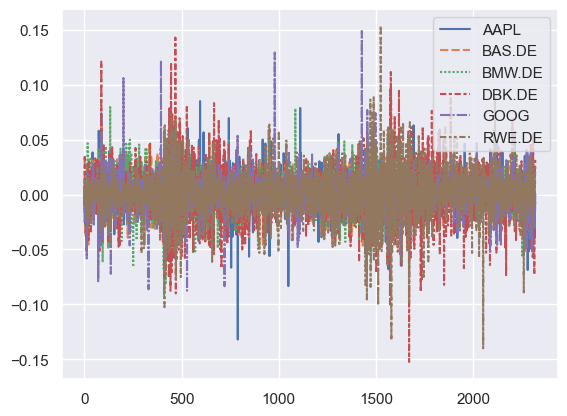

In [28]:
sns.lineplot(data = data);

In [105]:
data = data*100

In [169]:
data.reset_index(inplace=True)

In [170]:
PF = data.mean(axis=1)

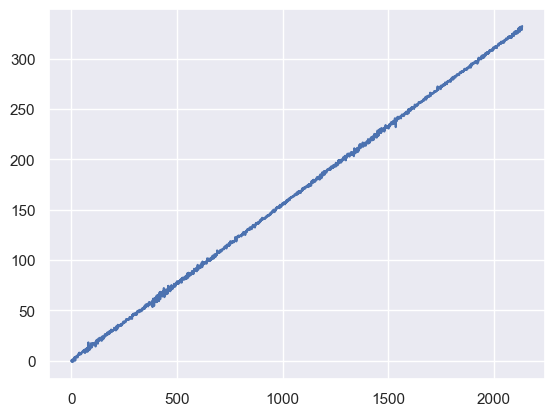

In [171]:
sns.lineplot(x = PF.index, y = PF);

GARCH

Estimate GARCH models for each return series $j=1,...,K$ and $t=1,..,T$

$r_{t,j} = \mu_{t,j}  + \epsilon_{t,j}$

$\epsilon_{t,j} = \sigma_{t,j} Z_{t,j} $


${\sigma_{t,j}}^2 = \omega_j +  \alpha_{k,j} \varepsilon_{t-1,j}^2 + \beta_{k,j} \sigma_{t-1,j}^2$ 

$Z_{t,j}$ as assumed innovation distribution and standardized residuals as 

$\hat{z}_{t,j} = \frac{1}{\hat{\sigma}_{t,j}} \Bigl(  r_{t,j} - \hat{\mu}_j       \Bigr)$


In [172]:
from arch import arch_model

In [173]:
def fit_model(data):
    am = arch_model(data, vol="Garch", p=1, o=0, q=1, dist="skewt", mean='constant')

    res = am.fit()

    return res



In [174]:
fitted = fit_model(data.iloc[:,0])

c:\Users\morit\anaconda3\envs\copulagarch\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.505e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 15758.675594591605
Iteration:      2,   Func. Count:     15,   Neg. LLF: 575841.8298330114
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1536432.794463513
Iteration:      4,   Func. Count:     31,   Neg. LLF: 957002.2076260807
Iteration:      5,   Func. Count:     39,   Neg. LLF: 764140.7969061199
Iteration:      6,   Func. Count:     47,   Neg. LLF: 163470.60464189132
Iteration:      7,   Func. Count:     55,   Neg. LLF: 605995.8269958841
Iteration:      8,   Func. Count:     64,   Neg. LLF: 604589.2844058109
Iteration:      9,   Func. Count:     73,   Neg. LLF: 667372.4116341356
Iteration:     10,   Func. Count:     82,   Neg. LLF: 703082.9308229012
Iteration:     11,   Func. Count:     91,   Neg. LLF: 725717.1258879998
Iteration:     12,   Func. Count:    100,   Neg. LLF: 693120.507647845
Iteration:     13,   Func. Count:    109,   Neg. LLF: 228610.8267124277
Iteration:     14,   Func. Count:    119,   Neg. LLF: 92088.532

c:\Users\morit\anaconda3\envs\copulagarch\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [175]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                             index   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -15041.9
Distribution:      Standardized Skew Student's t   AIC:                           30095.9
Method:                       Maximum Likelihood   BIC:                           30129.9
                                                   No. Observations:                 2134
Date:                           Sun, May 21 2023   Df Residuals:                     2133
Time:                                   22:23:48   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1808.9416     68.681     26.338 7.019e-153 [1.674e+03,1.944e+03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega       8924.2738    924.924      9.649  4.980e-22  [7.111e+03,1.074e+04]
alpha[1]       0.7314  1.429e-02     51.168      0.000      [  0.703,  0.759]
beta[1]        0.0000  8.214e-03      0.000      1.000 [-1.610e-02,1.610e-02]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta            7.2445      0.311     23.289 5.780e-120 [  6.635,  7.854]
lambda         0.9896  9.669e-03    102.348      0.000 [  0.971,  1.009]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Iteration limit reached.
See convergence_flag.

"""

In [176]:
fitted.std_resid

0      -1.845743
1      -1.166486
2      -1.166483
3      -1.166481
4      -1.166478
          ...   
2129    1.144266
2130    1.144366
2131    1.144466
2132    1.144565
2133    1.151436
Name: std_resid, Length: 2134, dtype: float64

In [177]:
fitted.forecast(horizon=1).variance

c:\Users\morit\anaconda3\envs\copulagarch\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,h.1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2129,NaN
2130,NaN
2131,NaN
2132,NaN


In [178]:
fitted.params

mu          1808.941643
omega       8924.273801
alpha[1]       0.731382
beta[1]        0.000000
eta            7.244504
lambda         0.989584
Name: params, dtype: float64

In [179]:
fitted._volatility

array([ 980.06134794, 1549.90420811, 1549.05059038, ...,  441.30487232,
        442.14029445,  442.9757921 ])

In [180]:
fitted_resid = fitted.resid / fitted.conditional_volatility

In [181]:
fitted.params[1] + fitted.params[2] * (np.std(data.iloc[:,0]) * fitted_resid.iloc[len(fitted_resid)-1])**2 + fitted.params[4] * np.var(data.iloc[:,0])**2

1470052141371.1694

In [182]:
fitted.params[1]

8924.273800527433

In [183]:
np.sqrt(0.1517)

0.3894868418830089

In [184]:
np.var(data.iloc[:,0])

450465.94626496267

In [185]:
fitted.forecast(horizon=1).residual_variance

c:\Users\morit\anaconda3\envs\copulagarch\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,h.1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2129,NaN
2130,NaN
2131,NaN
2132,NaN


In [122]:
np.var(data.iloc[:,0])

2.6245450727460096

In [123]:
len(fitted._volatility)

2134

In [149]:
fitted.params["mu"] + np.sqrt(fitted.conditional_volatility[2133]) * fitted.std_resid[2133]

-0.31714129469369434

In [150]:
data.iloc[2133,0]

0.05122365357554948

In [144]:
fitted

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                              AAPL   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -3851.15
Distribution:      Standardized Skew Student's t   AIC:                           7714.30
Method:                       Maximum Likelihood   BIC:                           7748.29
                                                   No. Observations:                 2134
Date:                           Sun, May 21 2023   Df Residuals:                     2133
Time:                                   22:04:35   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

In [132]:
data.iloc[2133, 0]

0.05122365357554948

In [133]:
fitted.params["mu"]

0.10144138479760982

In [134]:
data.iloc[2133, 0] - fitted.params["mu"]

-0.050217731222060344

In [143]:
np.

mu          0.101441
omega       0.150625
alpha[1]    0.115298
beta[1]     0.838461
eta         4.398359
lambda     -0.033146
Name: params, dtype: float64

In [142]:
fitted.resid[2133]* np.std(data.iloc[:,0]) + fitted.params["mu"]

-0.8220775243447326

In [135]:
fitted.conditional_volatility[2133]

1.8547058473792657

In [127]:
fitted_resid = fitted.resid / fitted.conditional_volatility

In [128]:
fitted_resid.iloc[len(fitted_resid)-1]

-0.019935501253624942

In [64]:
fitted_resid

0      -0.915354
1      -0.155490
2       0.323681
3      -0.600150
4      -0.782542
          ...   
2312    0.549057
2313   -1.586554
2314   -1.194839
2315   -1.799541
2319   -0.019936
Length: 2134, dtype: float64

In [62]:
len(fitted_resid)

2134

In [14]:
np.var(data.AAPL)

0.0002624545072745998

${\hat{\sigma}_{t+1,j}}^2 = \hat{\omega}_j +  \hat{\alpha}_{t,j} \hat{\sigma}^2_{t,j} \hat{z}^2_{t,j} + \hat{\beta}_{k,j} \hat{\sigma}_{t-1,j}^2$ 

In [15]:
def get_variance_forecast(model):
    omega_hat = model.params[1]
    alpha_hat = model.params[2]
    beta_hat = model.params[3]
    

In [17]:
def get_standardized_residuals(model, data):
    pass

In [18]:
res2 = fit_model(data.AAPL)

c:\Users\morit\anaconda3\envs\copulagarch\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002625. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 112111.96886110117
Iteration:      2,   Func. Count:     25,   Neg. LLF: 163634.5671788327
Iteration:      3,   Func. Count:     34,   Neg. LLF: 10516.399812734406
Iteration:      4,   Func. Count:     42,   Neg. LLF: 66550.35589574545
Iteration:      5,   Func. Count:     59,   Neg. LLF: 11666.90431061744
Iteration:      6,   Func. Count:     66,   Neg. LLF: 37466.090797714
Iteration:      7,   Func. Count:     76,   Neg. LLF: 2216422.956773467
Iteration:      8,   Func. Count:     85,   Neg. LLF: 104362.0423524979
Iteration:      9,   Func. Count:     94,   Neg. LLF: 128823.48115074394
Iteration:     10,   Func. Count:    108,   Neg. LLF: 356033.6148522099
Iteration:     11,   Func. Count:    125,   Neg. LLF: 42363.98050918724
Iteration:     12,   Func. Count:    132,   Neg. LLF: 126925.13343494658
Iteration:     13,   Func. Count:    144,   Neg. LLF: 40742.16210534518
Iteration:     14,   Func. Count:    151,   Neg. LLF: 136742.8

c:\Users\morit\anaconda3\envs\copulagarch\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [19]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                              AAPL   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                1669.58
Distribution:      Standardized Skew Student's t   AIC:                          -3327.17
Method:                       Maximum Likelihood   BIC:                          -3293.18
                                                   No. Observations:                 2134
Date:                           Sun, May 21 2023   Df Residuals:                     2133
Time:                                   20:57:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2019  1.405e-02    -14.367  8.290e-47 [ -0.229, -0.174]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.6245e-03  2.811e-03      0.934      0.351 [-2.886e-03,8.135e-03]
alpha[1]       1.0000      0.133      7.495  6.631e-14      [  0.738,  1.262]
beta[1]    4.1601e-05      0.103  4.058e-04      1.000      [ -0.201,  0.201]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
eta           15.7247      0.663     23.712 2.701e-124 [ 14.425, 17.024]
lambda        -0.9225  8.924e-03   -103.369      0.000 [ -0.940, -0.905]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [20]:
res2.params

mu          -0.201865
omega        0.002625
alpha[1]     1.000000
beta[1]      0.000042
eta         15.724660
lambda      -0.922504
Name: params, dtype: float64

In [21]:
res2.resid

0       0.185830
1       0.200014
2       0.208491
3       0.193004
4       0.190424
          ...   
2312    0.214774
2313    0.170176
2314    0.176306
2315    0.162192
2319    0.202377
Name: resid, Length: 2134, dtype: float64

In [22]:
res2.forecast

<bound method ARCHModelFixedResult.forecast of                            Constant Mean - GARCH Model Results                           
Dep. Variable:                              AAPL   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                1669.58
Distribution:      Standardized Skew Student's t   AIC:                          -3327.17
Method:                       Maximum Likelihood   BIC:                          -3293.18
                                                   No. Observations:                 2134
Date:                           Sun, May 21 2023   Df Residuals:                     2133
Time:                                   20:57:48   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. In

In [13]:
am5 = arch_model(data.AAPL*100, vol="Garch", p=1, o=0, q=1, dist="skewt", mean='constant')

In [14]:
am5.distribution.num_params

2

In [20]:
am5.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 61691.42068508366
Iteration:      2,   Func. Count:     18,   Neg. LLF: 135039.84003182483
Iteration:      3,   Func. Count:     27,   Neg. LLF: 81173.47908621424
Iteration:      4,   Func. Count:     36,   Neg. LLF: 147095.6063738566
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5525.809144590954
Iteration:      6,   Func. Count:     53,   Neg. LLF: 3863.196062792278
Iteration:      7,   Func. Count:     61,   Neg. LLF: 5194.31113095695
Iteration:      8,   Func. Count:     69,   Neg. LLF: 3858.982341343833
Iteration:      9,   Func. Count:     77,   Neg. LLF: 3851.3734042686165
Iteration:     10,   Func. Count:     85,   Neg. LLF: 3851.162105607421
Iteration:     11,   Func. Count:     93,   Neg. LLF: 3851.149772781636
Iteration:     12,   Func. Count:    100,   Neg. LLF: 3851.149615629203
Iteration:     13,   Func. Count:    107,   Neg. LLF: 3851.1496139155324
Iteration:     14,   Func. Count:    113,   Neg. LLF: 3851.149

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                              AAPL   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -3851.15
Distribution:      Standardized Skew Student's t   AIC:                           7714.30
Method:                       Maximum Likelihood   BIC:                           7748.29
                                                   No. Observations:                 2134
Date:                           Sun, Mar 12 2023   Df Residuals:                     2133
Time:                                   16:06:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

In [21]:
am5_fitted = am5.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 61691.42068508366
Iteration:      2,   Func. Count:     18,   Neg. LLF: 135039.84003182483
Iteration:      3,   Func. Count:     27,   Neg. LLF: 81173.47908621424
Iteration:      4,   Func. Count:     36,   Neg. LLF: 147095.6063738566
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5525.809144590954
Iteration:      6,   Func. Count:     53,   Neg. LLF: 3863.196062792278
Iteration:      7,   Func. Count:     61,   Neg. LLF: 5194.31113095695
Iteration:      8,   Func. Count:     69,   Neg. LLF: 3858.982341343833
Iteration:      9,   Func. Count:     77,   Neg. LLF: 3851.3734042686165
Iteration:     10,   Func. Count:     85,   Neg. LLF: 3851.162105607421
Iteration:     11,   Func. Count:     93,   Neg. LLF: 3851.149772781636
Iteration:     12,   Func. Count:    100,   Neg. LLF: 3851.149615629203
Iteration:     13,   Func. Count:    107,   Neg. LLF: 3851.1496139155324
Iteration:     14,   Func. Count:    113,   Neg. LLF: 3851.149

In [22]:
am5_fitted.params

mu          0.101442
omega       0.150627
alpha[1]    0.115299
beta[1]     0.838460
eta         4.398359
lambda     -0.033144
Name: params, dtype: float64

In [27]:
def get_resids_params(returns):
    params = []
    residuals = pd.DataFrame(columns=returns.columns)
    uniform = pd.DataFrame(columns=returns.columns)

    for i in range(0, returns.shape[1]):
        am = arch_model(100*returns.iloc[:, i], vol="Garch", p=1, o=0, q=1, dist="skewt")
        residuals[returns.columns[i]] = am.fit(disp="off").resid / am.fit(disp='off').conditional_volatility
        params.extend([{returns.columns[i]: am.fit(disp="off").params.to_dict()}])
        #uniform[returns.columns[i]] = am.distribution.cdf(residuals, parameters=[5,0.3])#am.fit(disp="off").params["eta"], am.fit(disp="off").params["lambda"]
        #print(am.fit().params["eta"])
        #am.distribution.cdf(residuals, parameters=[5,0.3])


    return params, residuals

In [28]:
get_resids_params(data)

([{'AAPL': {'mu': 0.1014416439253901,
    'omega': 0.1506266412786028,
    'alpha[1]': 0.11529873441545781,
    'beta[1]': 0.8384598586791208,
    'eta': 4.398359354333301,
    'lambda': -0.03314420672820922}},
  {'BAS.DE': {'mu': 0.04558713456485493,
    'omega': 0.027201046240750443,
    'alpha[1]': 0.05727509721895022,
    'beta[1]': 0.9325909568000725,
    'eta': 7.849038428723767,
    'lambda': -0.04867563810640872}},
  {'BMW.DE': {'mu': 0.037012700466833026,
    'omega': 0.009238913142817854,
    'alpha[1]': 0.036975917045191854,
    'beta[1]': 0.9608160848837023,
    'eta': 6.940803068597172,
    'lambda': 0.028259043380350526}},
  {'DBK.DE': {'mu': -0.06391671182725034,
    'omega': 0.05749897474849735,
    'alpha[1]': 0.05109186491473652,
    'beta[1]': 0.9384915030903684,
    'eta': 7.226761485229021,
    'lambda': -0.022056439457213774}},
  {'GOOG': {'mu': 0.057381430777707576,
    'omega': 0.05463304130139145,
    'alpha[1]': 0.03987587204325808,
    'beta[1]': 0.9382364665

In [ ]:
params_

[{'AAPL': {'mu': 0.10144174835471881,
   'omega': 0.15062481053401408,
   'alpha[1]': 0.11529849338093554,
   'beta[1]': 0.8384608393487325,
   'eta': 4.398350222402111,
   'lambda': -0.0331442661039331}},
 {'BAS.DE': {'mu': 0.04558679739719036,
   'omega': 0.027200953073555457,
   'alpha[1]': 0.05727479517227491,
   'beta[1]': 0.9325911673245905,
   'eta': 7.849176578033053,
   'lambda': -0.04867627619633638}},
 {'BMW.DE': {'mu': 0.03701272748723445,
   'omega': 0.009238866713722,
   'alpha[1]': 0.03697591024251973,
   'beta[1]': 0.9608160743717679,
   'eta': 6.940846787454488,
   'lambda': 0.028257901721633217}},
 {'DBK.DE': {'mu': -0.06391674003840897,
   'omega': 0.05749887073303873,
   'alpha[1]': 0.051091808058097224,
   'beta[1]': 0.9384915382410848,
   'eta': 7.226802619951065,
   'lambda': -0.022056888997994226}},
 {'GOOG': {'mu': 0.057381430777707576,
   'omega': 0.05463304130139145,
   'alpha[1]': 0.03987587204325808,
   'beta[1]': 0.9382364665241338,
   'eta': 3.66923636132

In [ ]:
def get_residuals(returns):
    
    params = []
    residuals = pd.DataFrame(columns=returns.columns)
    for i in range(0, returns.shape[1]):
        am = arch_model(100*returns.iloc[:, i], vol="Garch", p=1, o=0, q=1, dist="skewt")
        residuals[returns.columns[i]] = am.fit(disp="off").resid / am.fit(disp='off').conditional_volatility
        params.extend([{returns.columns[i]: am.fit(disp="off").params.to_dict()}])

    return residuals, params

In [ ]:
resids, params = get_residuals(data)

In [ ]:
def get_uniform(returns, resids, params):
    #print(params)
    
    uniform = pd.DataFrame(columns=data.columns)
    for i in range(0, data.shape[1]):
        am = arch_model(vol="Garch", p=1, o=0, q=1, dist="skewt")
        eta_ = params[i][data.columns[i]]['eta']
        lambda_ = params[i][data.columns[i]]['lambda']
        uniform[data.columns[i]] = am.distribution.cdf(data.iloc[:, i], parameters=[eta_, lambda_])

    return uniform.to_numpy()
    #u = am.distribution.cdf(garch_results, parameters=[res.params["eta"], res.params["lambda"]])


In [ ]:
uniform = get_uniform(resids, params)

TypeError: arch_model() missing 1 required positional argument: 'y'

In [ ]:
def simulate_from_vine_copula(data, n = 10000):
    copula = pv.Vinecop(data)
    simulated = copula.simulate(n)
    return simulated

In [ ]:
sims = simulate_from_vine_copula(uniform)

In [ ]:
def transform_to_dist(data):
    am = arch_model(data.AAPL*100, vol="Garch", p=1, o=0, q=1, dist="skewt")
    for i in range(0, data.shape[1]):
        eta_ = params[i][data.columns[i]]['eta']
        lambda_ = params[i][data.columns[i]]['lambda']
        uniform[data.columns[i]] = am.distribution.cdf(data.iloc[:, i], parameters=[eta_, lambda_])

In [ ]:
sims2 = transform_to_dist(sims)

AttributeError: 'numpy.ndarray' object has no attribute 'AAPL'

In [ ]:
len(sims[:,0])

10000

In [ ]:
sims.shape

(10000, 6)